# Методы семантического анализа текстов

## Сходство между словами

You shall know a word by the company it keeps. 

*Firth*

 Варкалось. Хливкие шорьки<br>
   Пырялись по наве,<br>
   И хрюкотали зелюки,<br>
   Как мюмзики в мове.<br>

*Кэррол*

Не очень ясно что именно могут делать *зелюки*. Но если мы узнаем кто еще может *хрюкотать*, то мы можем посчитать, что нашли слово со сходным значением или, как минимум, относящееся к одной смысловой группе.

Аналогично мы не понимаем кто (что) такие *шорьки*. Если они бывают ответственными - это одно, если электронными - другое.

### Предобработка текста

Теперь возьмем новостные тексты с сайта Lenta.ru за лето 2018 года. Разделим каждый текст на предложения, а предложения на слова.

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import nltk.data
from tqdm.notebook import tqdm
import pymorphy3

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/edward/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Файл в своем хитром формате, его просто надо порезать по разделителям.
with open("data/lenta2018.txt", encoding="utf-8") as newsfile: # Файл с новостями.
    text = newsfile.read()
    div_text = text.split("=====\n")[1:]
    text_news = [(n.split('\n')[0], '\n'.join(n.split('\n')[2:])) 
                 for n in div_text]
    news = pd.DataFrame(text_news, columns = ['Header', 'News'])

In [27]:
# Всё ли прочиталось?
news.head()

,Header,News
0,Раскрыто происхождение новейшей украинской кры...,Испытанная Украиной первая собственная крылата...
1,Русских гопников назвали настоящими древними с...,Пользователи Reddit выразили симпатию российск...
2,Поезд с американскими политиками врезался в му...,В американском штате Вирджиния пассажирский по...
3,Открыт первый европейский бордель с секс-кукла...,"Во Франции открылся первый бордель, который сд..."
4,Социологи подсчитали планирующих проголосовать...,На выборы президента собирается прийти 71 проц...


Давайте поделим тексты на предложения, а предложения на слова

In [28]:
def text_to_sentences(text):
    """ Функция делит текст на предложения, а предложения на слова.
    """
    
    # Поделим текст на предложения при помощи NLTK.
    raw_sentences = nltk.sent_tokenize(text, language="russian")
    # Поделим предложения на слова при помощи регулярных выражений, заодно выкинем знаки препинания и цифры.
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(re.findall('[a-zA-Zа-яА-яёЁ]+', raw_sentence.lower()))
    return sentences

In [6]:
news['News'][11]

'Ракета-носитель «Союз-2.1а» с 11 спутниками стартовала с космодрома Восточный. Об этом сообщает Космический центр «Южный», который ведет прямую трансляцию запуска.Корабль должен доставить на орбиты 11 спутников, два из которых — российские спутники дистанционного зондирования Земли «Канопус-В» №3 и №4.Это уже третий пуск с Восточного. Предыдущий состоялся 28 ноября 2017 года и завершился неудачей — из-за неполадок с разгонным блоком была утеряна головная часть ракеты «Союз-2.1б» (с 19 спутниками на борту). В госкорпорации «Роскосмос» объяснили инцидент ошибкой в программном обеспечении разгонного блока и ракеты-носителя, заложенной еще 20 лет назад. Позже вице-премьер России Дмитрий Рогозин заявил, что при подготовке запуска сотрудники перепутали космодромы: «Союз-2.1б» запускали с Восточного, при этом параметры траектории рассчитали с учетом старта с Байконура.В ближайшие годы «Роскосмос» ставит задачу повысить долю успешных запусков ракет-носителей до 99 процентов.\n'

In [5]:
text_to_sentences(news['News'][11])

[['ракета',
  'носитель',
  'союз',
  'а',
  'с',
  'спутниками',
  'стартовала',
  'с',
  'космодрома',
  'восточный'],
 ['об',
  'этом',
  'сообщает',
  'космический',
  'центр',
  'южный',
  'который',
  'ведет',
  'прямую',
  'трансляцию',
  'запуска',
  'корабль',
  'должен',
  'доставить',
  'на',
  'орбиты',
  'спутников',
  'два',
  'из',
  'которых',
  'российские',
  'спутники',
  'дистанционного',
  'зондирования',
  'земли',
  'канопус',
  'в',
  'и',
  'это',
  'уже',
  'третий',
  'пуск',
  'с',
  'восточного'],
 ['предыдущий',
  'состоялся',
  'ноября',
  'года',
  'и',
  'завершился',
  'неудачей',
  'из',
  'за',
  'неполадок',
  'с',
  'разгонным',
  'блоком',
  'была',
  'утеряна',
  'головная',
  'часть',
  'ракеты',
  'союз',
  'б',
  'с',
  'спутниками',
  'на',
  'борту'],
 ['в',
  'госкорпорации',
  'роскосмос',
  'объяснили',
  'инцидент',
  'ошибкой',
  'в',
  'программном',
  'обеспечении',
  'разгонного',
  'блока',
  'и',
  'ракеты',
  'носителя',
  'заложе

In [7]:
all_sentences = sum([text_to_sentences(x) for x in news['News']], [])

In [8]:
all_sentences[0]

['испытанная',
 'украиной',
 'первая',
 'собственная',
 'крылатая',
 'ракета',
 'создана',
 'кб',
 'луч',
 'в',
 'рамках',
 'окр',
 'нептун',
 'на',
 'основе',
 'российской',
 'противокорабельной',
 'ракеты',
 'м',
 'комплекса',
 'х',
 'у']

## Модель Word2Vec

Модель описана в статье [Т.Миколова и др.](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) Идея метода основывается на оптимизации функционала, основанного на логарифмах вероятностей совместной встречаемости слов. Помимо этого, вводятся отрицательные примеры, вероятности которых не суммируются, а вычитаются. При этом отрицательных примеров берется больше, чем положительных.

Если говорить проще, то при обучении модель считает статистику, какое слово с каким сколько раз стояло рядом. За счет этого мы можем построить вектор частоты встречаемости слова с другими словами в одном окне текста заданной длины. Если два слова встречаются с одними и теми же словами с примерно одинаковой частотой (_котик кушает, бегает, спит, кусается_ и похожий на него _щенок кушает, бегает, спит, кусается, охраняет_), то это два похожих слова. Если два слова встречаются с разными словами (_котик кушает, бегает, спит, кусается_, но _электрон занимает орбиту, взаимодействует, перемещается_), значит это разные слова. У нас есть вектора слов большой размерности, нам надо впихнуть эти вектора в пространство меньшей размерности, положив похожие слова рядом, а непохожие - в разные места. Мы уже где-то встречали эту задачу! Но Миколов и др. использовали для ее решения простой персептрон.

Можно провести аналогию с SVD. У нас строится некоторое пространство, размерность которого определяется числом латентных переменных в системе - скрытых параметров, каждый из которых отвечает за какой-то "смысл": размер, цвет, политика, время, абстрактность, падеж слова и прочее. Количество признаков в этом пространстве определяется числом подобных скрытых переменных.

Не вникая в особенности устройства модели, научимся ею пользоваться. Для этого будем использовать библиотеку Gensim.

In [10]:
!pip install --break-system-packages gensim

Defaulting to user installation because normal site-packages is not writeable


In [11]:
# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models import KeyedVectors # Семантические вектора.

### Использование предобученных моделей

У нас есть два пути:
- взять большое количество текстов и обучить на них собственную модель;
- найти модель, которую уже обучили добрые люди и выложили в сеть.

По первому пути не пойдём, пойдем по второму пути - загрузим модель, обученную разработчиками проекта [RusVectores](https://rusvectores.org/ru/models/) для русского языка на новостях. Я ее уже скачал и она лежит в каталоге `data`.

In [12]:
# Загружаем модель в память.
model_w2v = KeyedVectors.load_word2vec_format('data/araneum_upos_skipgram_300_2_2018.vec.gz')

Теперь можно получить представление слов в новом пространстве. Имейте в виду, что в данной модели слова сохранены с частями речи, чтобы различать разные значения!

In [13]:
# Передаем модели слово с частью речи, получаем вектор.
model_w2v['огонь_NOUN']

array([-2.69010e-02,  1.08851e-01,  1.13100e-03, -2.76620e-02,
       -2.50680e-02, -4.58600e-03, -1.26100e-03, -3.79600e-03,
       -7.53080e-02, -2.39490e-02,  2.00400e-02,  6.10330e-02,
        7.40810e-02,  9.56330e-02, -1.11446e-01,  4.60380e-02,
       -2.24540e-02, -2.46080e-02, -8.82250e-02, -1.53180e-02,
       -3.66000e-04, -9.46770e-02,  1.33686e-01,  5.88400e-03,
       -5.05470e-02,  8.13820e-02, -2.88090e-02, -7.00070e-02,
        8.74950e-02, -8.31860e-02, -2.48210e-02, -3.82660e-02,
        6.13210e-02, -6.45530e-02,  2.66400e-03,  8.36140e-02,
       -3.73850e-02,  3.63260e-02, -1.20000e-04, -6.90000e-02,
        1.49810e-02,  3.03880e-02, -2.17280e-02,  2.79400e-02,
       -5.22550e-02,  1.96660e-02,  1.52499e-01,  7.27100e-02,
       -2.11140e-02,  5.69930e-02, -3.07870e-02,  4.09070e-02,
        6.49290e-02,  1.91730e-02,  2.50080e-02, -2.94090e-02,
        6.33780e-02,  1.09028e-01,  5.66630e-02, -3.62330e-02,
        4.96900e-02, -7.09280e-02,  2.74420e-02, -1.986

In [14]:
# Просим модель вернуть нам несколько слов, наиболее похожих на данное там в семантическом пространстве.
model_w2v.most_similar('интернет_NOUN')

[('интеренет_NOUN', 0.924296498298645),
 ('интерент_NOUN', 0.9155471920967102),
 ('интренет_NOUN', 0.9038118720054626),
 ('интрнет_NOUN', 0.8466425538063049),
 ('итернет_NOUN', 0.834010660648346),
 ('интенета_NOUN', 0.8012408018112183),
 ('инетрнет_NOUN', 0.7921422719955444),
 ('интерет_NOUN', 0.786211371421814),
 ('инетернет_NOUN', 0.7794284224510193),
 ('интернт_NOUN', 0.7663599252700806)]

In [15]:
model_w2v.most_similar('ученый_NOUN')

[('исследователь_NOUN', 0.8123084902763367),
 ('биолог_NOUN', 0.7502084374427795),
 ('астрофизик_NOUN', 0.7438788414001465),
 ('ученый_ADJ', 0.7298716306686401),
 ('нейрофизиолог_NOUN', 0.7224255204200745),
 ('нейробиолог_NOUN', 0.7219529151916504),
 ('климатолог_NOUN', 0.7159756422042847),
 ('зоолог_NOUN', 0.7055575251579285),
 ('астроном_NOUN', 0.7006036639213562),
 ('палеонтолог_NOUN', 0.6994451880455017)]

 В полученном пространстве работают векторные операции. Если обучиться на достаточно большом количестве текстов, можно получить следующие эффекты.

![](img/w2v_vect.png)

![](img/w2v_vect2.png)



На хорошо обученной модели можно даже превратить индекс в город и наоборот при помощи векторных операций.

Попробуем эти векторные операции своими руками.

In [16]:
# Список всех слов
list(model_w2v.key_to_index.keys())[:20]

['год_NOUN',
 'мочь_VERB',
 'человек_NOUN',
 'время_NOUN',
 'работа_NOUN',
 'новый_ADJ',
 'становиться_VERB',
 'также_ADV',
 'очень_ADV',
 'день_NOUN',
 'первый_ADJ',
 'компания_NOUN',
 'являться_VERB',
 'ребенок_NOUN',
 'иметь_VERB',
 'система_NOUN',
 'место_NOUN',
 'получать_VERB',
 'большой_ADJ',
 'жизнь_NOUN']

Длины векторов нормированы.

In [17]:
lens = np.array([np.linalg.norm(model_w2v[word]) for word in model_w2v.key_to_index.keys()])
lens[lens > 1.01], lens[lens < 0.99], lens[0]

(array([], dtype=float32), array([], dtype=float32), np.float32(0.9999996))

In [18]:
# model_w2v.most_similar(positive=[u'король_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
# model_w2v.most_similar(positive=[u'птица_NOUN', u'плавник_NOUN'], negative=[u'крыло_NOUN'])
#model_w2v.most_similar(positive=[u'пожар_NOUN'])
# model_w2v.most_similar(positive=[u'пожар_NOUN'], negative=[u'пламя_NOUN' ])
model_w2v.most_similar(positive=[u'топливо_NOUN', u'молоко_NOUN'], negative=[u'нефть_NOUN' ])
# model_w2v.most_similar(positive=[u'император_NOUN', u'женщина_NOUN' ], negative=[u'мужчина_NOUN'])
# model_w2v.most_similar(positive=[u'президент_NOUN', u'женщина_NOUN'], negative=[u'мужчина_NOUN'])
# model_w2v.most_similar(negative=[u'король_NOUN', u'мужчина_NOUN'], positive=[u'женщина_NOUN'])
# model_w2v.most_similar(positive=[u'король_NOUN', u'мужчина_NOUN'], negative=[u'женщина_NOUN'])
#model_w2v.most_similar(positive=[u'женщина_NOUN', u'король_NOUN' ])
# model_w2v.most_similar(positive=[u'берлин_PROPN', u'москва_PROPN' ], negative=[u'германия_PROPN'])
# model_w2v.most_similar(positive=[u'германия_PROPN', u'москва_PROPN' ], negative=[u'берлин_PROPN'])
# model_w2v.most_similar(positive=[u'сербия_PROPN', u'москва_PROPN' ], negative=[u'белград_PROPN'])


[('творог_NOUN', 0.5371792316436768),
 ('простокваша_NOUN', 0.5271342992782593),
 ('ряженка_NOUN', 0.5241650342941284),
 ('пастеризовать_VERB', 0.5142461061477661),
 ('молозиво_NOUN', 0.5060350298881531),
 ('зцм_X', 0.5038546323776245),
 ('йогурт_NOUN', 0.49585244059562683),
 ('сквашивать_VERB', 0.49436309933662415),
 ('ацидофилин_NOUN', 0.4935595393180847),
 ('солярка_NOUN', 0.4921620488166809)]

Можно найти лишнее слово в последовательности.

In [19]:
model_w2v.doesnt_match(['лук_NOUN', 'перец_NOUN', 'ученик_NOUN', 'плодовый_ADJF'])

'ученик_NOUN'

Итак, вместо самих слов мы можем использовать их векторные представления в некотором семантическом пространстве.

![](img/cartoon-espresso-word2vec.jpg)

Беда Word2Vec состоит в том, что он генерирует только один вектор на каждое слово. То есть он не различает различных смыслов одного слова.

![](img/cartoon-citizen-data-scientist.jpg)

### Как устроено векторное пространство?

Давайте посмотрим на реальное расположение слов в этом пространстве. Для этого нам потребуется UMAP, а то как еще мы преобразуем 300-мерное пространство в плоскость? Просто преобразуем полученные от модели 300-мерные вектора в плоскость и полюбуемся результатом.

In [22]:
!pip install --break-system-packages umap-learn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from umap import UMAP
from copy import copy

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams['figure.figsize'] = (16, 12)

Чтобы любоваться предметно, возьмем названия разных растений, условно разделенных на травы и деревья. Это поможет нам оценить, насколько близко или далеко оказываются сходные слова.

In [23]:
# Прочитаем слова из файлов.
trees = pd.read_csv("data/trees.txt", sep='\t', names=['trees'])
herbs = pd.read_csv("data/herbs.txt", sep='\t', names=['herbs'])
# Положим их в таблицы.
trees = trees['trees'].str.lower().unique()
herbs = herbs['herbs'].str.lower().unique()

In [24]:
def draw_plants(model_w2v, trees, herbs):
    """ Функция принимает на вход модель Word2Vec и списки деревьев и трав.
        Для каждого слова получается его вектор, вектора преобразуются к 2D и отрисовываются.
    """
    
    # Получаем вектора слов, заодно отсеивая слова, отсутствующие в модели.
    all_vect, all_names, all_types = [], [], []

    for plants, plant_type in zip([trees, herbs], [1, 0]):
        for m in plants:
            # Работать с Word2Vec можно немного по-разному...
            if type(model_w2v) is KeyedVectors and \
               m.strip().lower()+'_NOUN' in model_w2v.key_to_index.keys():
                # Но нам в любом случае надо проверить если слово в модели и добавить его вектор.
                all_vect.append(model_w2v[m.strip().lower()+'_NOUN'])
                all_names.append(m)
                all_types.append(plant_type)
#             if ((type(model_w2v) is Word2Vec) or \
#                 (type(model_w2v) is gensim.models.word2vec.Word2Vec)) and \
            elif type(model_w2v) is Word2Vec and \
               m.strip().lower()+'_NOUN' in model_w2v.wv.key_to_index.keys():
                all_vect.append(model_w2v.wv[m.strip().lower()+'_NOUN'])
                all_names.append(m)
                all_types.append(plant_type)
#             else:
#                 print(type(model_w2v), m)

    # Преобразовываем к 2D.
    umaped_vct=UMAP().fit_transform(all_vect)
    
    # Рисуем все слова, деревья и травы разным цветом.
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], c=all_types, s=3)

    # Смотрим куда попали родовые понятия, рисуем их красным.
    for word in ['фрукт', 'овощ', 'ягода', 'приправа', 'пряность', 'дерево', 'трава', 'цветок', 'куст']:
        ind = all_names.index(word)
        ax.scatter(umaped_vct[ind, 0], umaped_vct[ind, 1], c='r', s=7)

    # Добавляем названия для нарисованных точек.
    for n, v in zip(all_names, umaped_vct):
        ax.annotate(n, (v[0], v[1]))

    plt.show()
    return all_vect, all_names

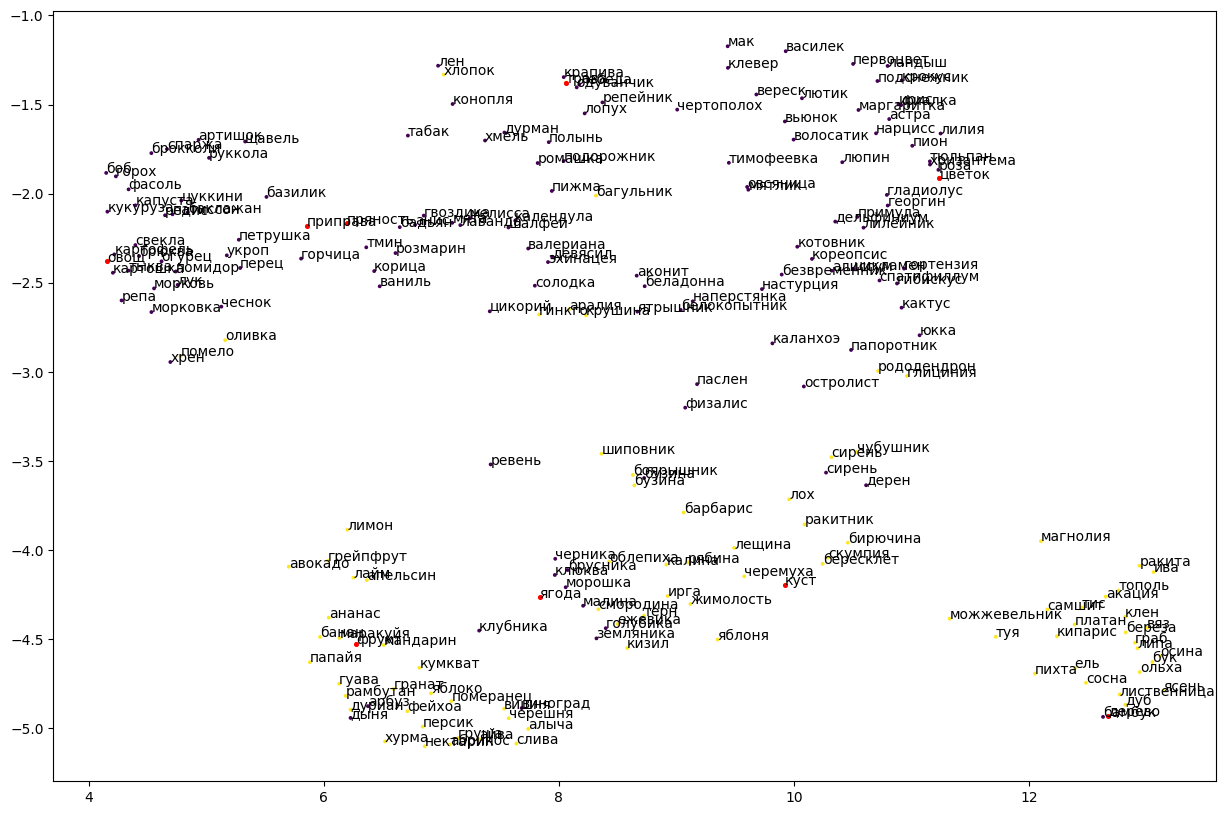

In [25]:
all_vect, all_names = draw_plants(model_w2v, trees, herbs)

А теперь давайте добавим ещё одно измерение и посмотрим, как точки будут меняться вдоль него.

In [26]:
from ipywidgets import interact, FloatSlider

In [27]:
umaped_vct = UMAP(n_components=3).fit_transform(all_vect)

In [28]:
def drawHerbs(val):
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    temp_data = np.array([u for u in umaped_vct if u[2]>=val-0.5 and u[2]<=val+0.5])
    temp_names = [all_names[i] for i, u in enumerate(umaped_vct) if u[2]>=val-0.5 and u[2]<=val+0.5]
    
    ax.scatter(temp_data[:, 0], temp_data[:, 1], c=temp_data[:, 2], s=30)

    for word in ['фрукт', 'овощ', 'ягода', 'приправа', 'пряность', 'дерево', 'трава', 'цветок', 'куст']:
        ind = all_names.index(word)
        ax.scatter(umaped_vct[ind, 0], umaped_vct[ind, 1], c='r', s=7)
        ax.annotate(word, (umaped_vct[ind, 0], umaped_vct[ind, 1]))

    for n, v in zip(temp_names, temp_data):
        ax.annotate(n, (v[0], v[1]))

    plt.show()

In [29]:
# sld1 = FloatSlider(value=(min(umaped_vct[:, 2])+max(umaped_vct[:, 2]))/2, 
sld1 = FloatSlider(value=(min(umaped_vct[:, 2])+max(umaped_vct[:, 2]))/2, 
                   min=min(umaped_vct[:, 2]), max=max(umaped_vct[:, 2]), 
                   step=0.1, description='Filter by Z')

interact(drawHerbs, val=sld1);

interactive(children=(FloatSlider(value=7.075819969177246, description='Filter by Z', max=9.293642044067383, m…

----

## Векторизация текстов

Работать с векторами слов бывает очень полезно. Так, например, если нам нужно подать на вход нейросети вектор предложения, то мы можем предположить, что предложения не содержат больше 200 слов. Тогда на потребуется вектор длины `200 * 300 = 60 000` чтобы отдать любое предложение. На место имеющихся слов запишем их вектор, на место тех, что выходят за длину предложения - нули. 

Но иногда бывает необходимо работать с текстом как вектором. В такой ситуации удобно взять векторы всех слов в тексте и посчитать их средний вектор, считая что именно он будет представлять некоторый усредненный "смысл" текста.

Так как нам теперь придется работать не просто с начальными формами слов, а с их векторами, а вектора в имеющейся модели можно получить только по начальной форме и части речи, то нам необходимо написать фунцию для разметки текстов так, чтобы выход содержал в себе и часть речи. Заодно будем брать только слова со значимыми частями речи: прилагательные, существительные и глаголы.

In [38]:
# Список значимых частей речи.
conv_pos = {'ADJF':'ADJ', 'ADJS':'ADJ', 'ADV':'ADV', 'NOUN':'NOUN',
            'VERB':'VERB', 'PRTF':'ADJ', 'PRTS':'ADJ', 'GRND':'VERB'}
tmp_dict = {}
nones = {}

# Фильтруем по части речи и возвращаем только начальную форму.
def normalizePymorphy(text, morph):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        if t in tmp_dict.keys():
            words.append(tmp_dict[t])
        elif t in nones.keys():
            pass
        else:
            pv = morph.parse(t)
            if pv[0].tag.POS != None:
                if pv[0].tag.POS in conv_pos.keys():
                    words.append(pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS])
                    tmp_dict[t] = pv[0].normal_form+"_"+conv_pos[pv[0].tag.POS]
                else:
                    nones[t] = ""
                    
    return words

Теперь посмотрим какова размерность векторов, хранимых в модели, и сколько в ней слов.<br>
Размерность векторов 300 - с запасом. Почти 200 000 слов - тоже очень хорошо.

In [32]:
print(model_w2v.vector_size)
print(len(model_w2v.index_to_key))

300
196620


Можно посмотреть на слова, которые есть в модели. Если какого слова в ней нет, модель не вернет вектор для этого слова.

In [33]:
model_w2v.index_to_key[:50]

['год_NOUN',
 'мочь_VERB',
 'человек_NOUN',
 'время_NOUN',
 'работа_NOUN',
 'новый_ADJ',
 'становиться_VERB',
 'также_ADV',
 'очень_ADV',
 'день_NOUN',
 'первый_ADJ',
 'компания_NOUN',
 'являться_VERB',
 'ребенок_NOUN',
 'иметь_VERB',
 'система_NOUN',
 'место_NOUN',
 'получать_VERB',
 'большой_ADJ',
 'жизнь_NOUN',
 'вопрос_NOUN',
 'хороший_ADJ',
 'должный_ADJ',
 'вид_NOUN',
 'город_NOUN',
 'сайт_NOUN',
 'случай_NOUN',
 'дело_NOUN',
 'дом_NOUN',
 'сделать_VERB',
 'давать_VERB',
 'говорить_VERB',
 'россия_PROPN',
 'возможность_NOUN',
 'высокий_ADJ',
 'страна_NOUN',
 'область_NOUN',
 'мир_NOUN',
 'работать_VERB',
 'данный_ADJ',
 'начинать_VERB',
 'часть_NOUN',
 'качество_NOUN',
 'знать_VERB',
 'сказать_VERB',
 'позволять_VERB',
 'хорошо_ADV',
 'хотеть_VERB',
 'нужно_ADV',
 'принимать_VERB']

У нас есть смысл отдельных слов. Построим на его основе смысл текста как среднее арифметическое всех векторов для слов, составляющих данный текст.

In [39]:
index2word_set = set(model_w2v.index_to_key)

def text_to_vec(text):
    text_vec = np.zeros((model_w2v.vector_size,), dtype="float32")
    n_words = 0
    morph = pymorphy3.MorphAnalyzer()

    for word in normalizePymorphy(text, morph):
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model_w2v[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec


Рассчитаем вектора всех текстов - они нам еще пригодятся.

In [40]:
w2v_vectors = [text_to_vec(text) for text in news.News]

Найдем текст, самый похожий на некоторый текст.

In [41]:
vpos = 72
v1 = text_to_vec(news.News[vpos])

ms = np.argmin([np.linalg.norm(v1-w2v_vectors[i]) for i in range(news.News.shape[0]) if i!=vpos])
print(news.News[vpos])
if ms>vpos:
    print(ms+1, news.News[ms+1])
else:
    print(ms, news.News[ms])

В одной из больниц Флориды скончался американец Ли Гоггин, который попал под обвал дюны на одном из городских пляжей. Об этом на своей странице в Facebook рассказала сестра погибшего Рейчел.Мужчина находился в состоянии медикаментозной комы в течение двух дней и умер от остановки сердца. Ему было 33 года. У него остались жена и трое детей.Материалы по теме00:09 — 17 январяБомбический отдыхЧто делать туристу во время ядерной войныРанее сообщалось, что инцидент произошел в воскресенье, 28 января, на пляже Кресент во Флориде. Ли Гоггин из Техаса отдыхал с семьей и решил ради шутки закопать себя в песок. Внезапно туннель, который он вырыл, обрушился под ним, и мужчину засыпало песком от расположенных вокруг дюн. В отчете полиции говорится, что члены семьи пытались выкопать мужчину самостоятельно, однако у них ничего не вышло, и они вызвали службу спасения.Спасатели извлекли Гоггина в состоянии остановки сердца из ямы глубиной около метра, где он провел около 30 минут. После восстановления 

Теперь посмотрим как распределятся тексты в новом пространстве.

In [42]:
umap_news = UMAP()
umaped_vct = umap_news.fit_transform(w2v_vectors)

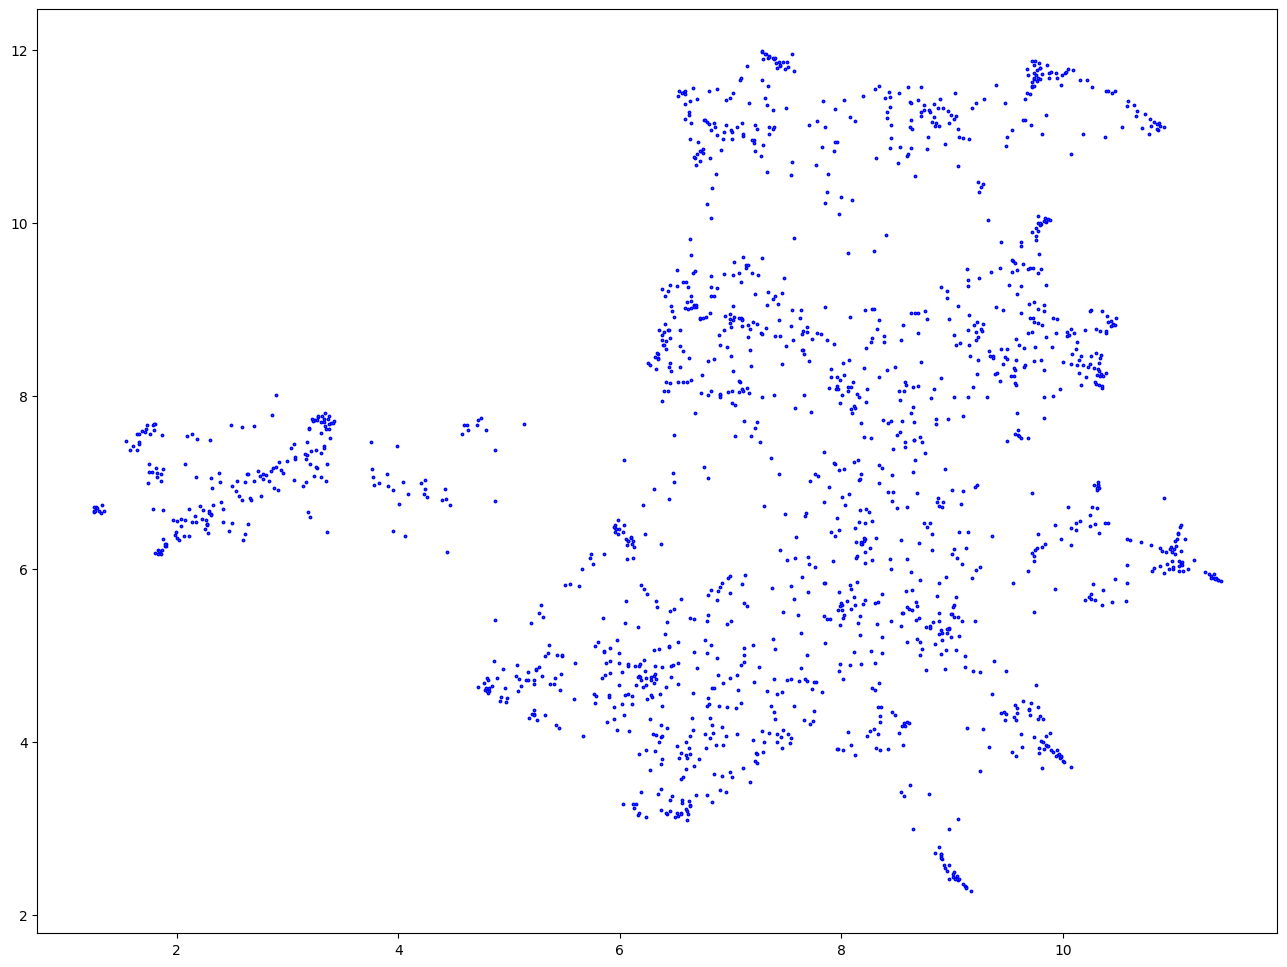

In [43]:
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()

## BERT

Bert исправляет сразу несколько недостатков, которые имеются у Word2Vec. Во-первых, как и FastText, он разбивает слова на части и приписывает вектора именно им. Помимо этого, вектор приписывается слову в контексте. Если слово обладает несколькими значениями, контекст может помочь определить конкретное значение употребления этого слова. По данному признаку все модели делятся на статические и контекстуализированные. Статические, такие как Word2Vec и FastText, возвращают вектор по слову. Контекстуализированные, такие как Bert и Elmo, получают на вход предложение, используют его как контекст и возвращают векторы для всех слов (частей слов) предложения.

Word2Vec обучает нейронную сеть, получает с ее помощью векторы для всех слов, а дальше работает как словарь. В основе Bert лежит более умная нейронная сеть, и Bert применяет ее для того, чтобы вывести вектор для всех слов в переданном тексте. То есть Word2Vec хранит словарь, Bert хранит веса нейросети.

In [87]:
!pip install --break-system-packages transformers torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

from umap import UMAP
# from copy import copy

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 12)

Загрузим модель `DeepPavlov/rubert-base-cased-sentence`, созданную DeepPavlov и обученную на предложениях.

Также попробуем сказать PyTorch, на котором написана модель, что надо попытаться работать с CUDA, а если не получится - на процессоре.

In [4]:
# tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")
# model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased-sentence")
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device);

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


У токенизатора есть множество параметров. 
- `return_tensors` - повзволяет выбрать, какой тип данных должен быть на выходе. Есть вариант `tf` (`tensorflow`), `pt` (`pytorch`) и  `np` (`numpy`). Если не указано, то вернет просто списки.  
- `padding` - задает, нужен ли и какой паддинг (дополнение) входа. Умеет дополнять: до самой большой длины входа или до максимальной длины, указанной в параметре.  
- `truncation` - нужно ли обрезать последовательность.  
- `max_length` - максимальная длина последовательности.  


In [3]:
tokenizer.tokenize('Что ты здесь делаешь?')

['Что', 'ты', 'здесь', 'дела', '##ешь', '?']

In [4]:
tokenizer.encode('Что ты здесь делаешь?')

[101, 13302, 4609, 10378, 11725, 26318, 166, 102]

In [5]:
tokenizer.decode(tokenizer.encode('Что ты здесь делаешь?'))

'[CLS] Что ты здесь делаешь? [SEP]'

In [6]:
list(tokenizer.vocab.items())[:10]

[('вдвоём', 82619),
 ('межпланет', 75577),
 ('र', 1324),
 ('погибают', 64374),
 ('уровни', 45245),
 ('##уту', 48943),
 ('серебра', 29631),
 ('секции', 27887),
 ('кольцу', 89052),
 ('##новые', 43756)]

Теперь посморим какие векторы возвращает модель. Сама модель тоже умеет работать как вызываемый объект.

In [7]:
text_1 = "папа мыл раму"
encoded_text = tokenizer(text_1, return_tensors='pt')
# output = model(**encoded_text)
output = model(**{k: v.to(model.device) for k, v in encoded_text.items()})


In [8]:
encoded_text

{'input_ids': tensor([[   101,  24820,   8235,    864, 102556,    102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [9]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0380,  0.0015,  0.1446,  ..., -0.2276, -0.0833, -0.0839],
         [ 0.2882, -0.3174,  0.7672,  ..., -0.7258, -0.3127,  0.1324],
         [ 0.2093,  0.0681,  1.0205,  ...,  0.1464, -0.7093, -0.2672],
         [ 1.0143, -0.0960,  0.9558,  ...,  0.4879,  0.0507, -0.8887],
         [ 0.4039, -0.1977,  0.7631,  ..., -0.2076, -0.7332, -0.2477],
         [ 0.2161,  0.3481, -0.1269,  ..., -0.6607, -0.1850,  0.3853]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 1.3736e-01, -1.7568e-02,  6.6183e-02,  2.4019e-01,  6.9638e-02,
          2.1487e-01,  1.1497e-02,  6.9869e-02, -9.9349e-02,  9.8826e-02,
         -3.6310e-02, -1.0631e-01, -7.3215e-02, -9.5991e-02,  4.8378e-03,
         -8.1177e-02,  5.6647e-01, -2.4748e-02, -4.6602e-02, -1.6316e-01,
         -9.9992e-01,  8.0519e-03, -1.6439e-01, -2.0468e-02, -1.6077e-01,
         -5.5557e-03, -5.5666e-02,  3.9520e-02, -5.3611e-03,  1.1353e-02,
       

In [10]:
output.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [11]:
output.last_hidden_state.shape

torch.Size([1, 6, 768])

In [12]:
for id in encoded_text['input_ids'][0]:
    print(id, tokenizer.decode(id))

tensor(101) [CLS]
tensor(24820) папа
tensor(8235) мы
tensor(864) ##л
tensor(102556) раму
tensor(102) [SEP]


Помимо собственно векторов, мы можем получить матрицу внимания, которая показывает связи между токенами.

In [13]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [14]:
toks = tokenizer(text_1, padding='max_length', truncation=True, return_tensors='pt',
          max_length=16)
with torch.no_grad():
    model_output = model(**{k: v.to(model.device) for k, v in toks.items()},
                         output_attentions=True,
                         output_hidden_states=True)

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [15]:
model_output.hidden_states

(tensor([[[ 1.0899,  0.6695,  0.1660,  ..., -0.4907, -0.6739,  0.4493],
          [ 0.0850, -0.0755, -0.6208,  ...,  0.5659,  0.5554,  0.7596],
          [-0.1322,  0.3856,  0.7329,  ..., -1.2313,  0.3896, -0.1992],
          ...,
          [ 0.0420, -0.0391,  0.3443,  ...,  1.0281,  0.8131,  0.5688],
          [ 0.0471, -0.1948,  0.3962,  ...,  0.8224,  0.5645,  0.7447],
          [ 0.1917, -0.3757,  0.3045,  ...,  0.9916,  0.5600,  0.4435]]]),
 tensor([[[ 0.5782,  0.2855,  0.2904,  ..., -0.2897, -0.4948,  0.3558],
          [ 0.3727, -0.2356, -0.9628,  ...,  0.5947,  0.0535,  0.3103],
          [-0.1586,  0.7612,  0.5919,  ..., -0.8858, -0.6726, -0.3870],
          ...,
          [ 0.2721,  0.4426,  0.4421,  ..., -0.1819,  0.0709,  0.2922],
          [ 0.2667,  0.4194,  0.5403,  ..., -0.2685, -0.0292,  0.3372],
          [ 0.3286,  0.2652,  0.4797,  ..., -0.2320, -0.0801,  0.1385]]]),
 tensor([[[ 0.2626, -0.0446,  0.1371,  ..., -0.2094, -0.0871,  0.1453],
          [ 0.4018, -0.5952,

In [16]:
model_output.attentions[0].shape, model_output.attentions

(torch.Size([1, 12, 16, 16]),
 (tensor([[[[0.3747, 0.0473, 0.0888,  ..., 0.0000, 0.0000, 0.0000],
            [0.0863, 0.4948, 0.0630,  ..., 0.0000, 0.0000, 0.0000],
            [0.0351, 0.0342, 0.8490,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.2141, 0.1418, 0.0809,  ..., 0.0000, 0.0000, 0.0000],
            [0.2095, 0.1398, 0.0772,  ..., 0.0000, 0.0000, 0.0000],
            [0.2010, 0.1203, 0.0782,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[0.3472, 0.0805, 0.0821,  ..., 0.0000, 0.0000, 0.0000],
            [0.0538, 0.2497, 0.2409,  ..., 0.0000, 0.0000, 0.0000],
            [0.0479, 0.0468, 0.7010,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.1581, 0.1735, 0.1314,  ..., 0.0000, 0.0000, 0.0000],
            [0.1245, 0.1824, 0.1366,  ..., 0.0000, 0.0000, 0.0000],
            [0.1234, 0.1777, 0.1479,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[0.1620, 0.0533, 0.0232,  ..., 0.0000, 0.0000, 0.0000],
            [0.1428, 0.3379, 0.0278,  ..., 0

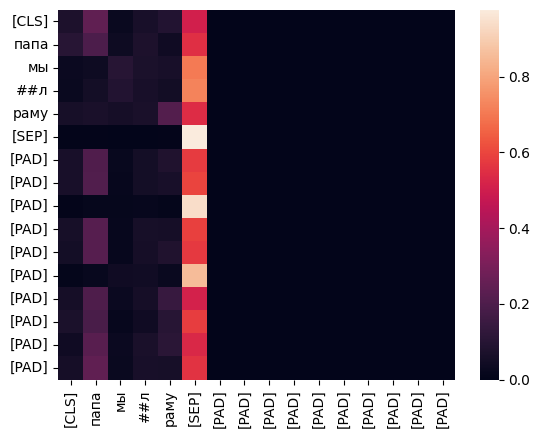

In [17]:
words = tokenizer.convert_ids_to_tokens(toks['input_ids'][0])
sns.heatmap(
    torch.mean(model_output.attentions[10], dim=1).squeeze(),
    xticklabels=words,
    yticklabels=words
    );

Исследуем как себя ведёт Bert в разных ситуациях.

In [5]:
def encode_sentence1(text, tokenizer, model):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**{k: v.to(model.device) for k, v in encoded_text.items()})
    return output.last_hidden_state[0]

def encode_sentence2(text, tokenizer, model):
    encoded_text = tokenizer(text, return_tensors='pt')
    model.embeddings.word_embeddings(encoded_text['input_ids'])
    return output.last_hidden_state[0]

"Папа" в разных контекстах не похож сам на себя.

In [19]:
s1 = encode_sentence1("папа моет раму", tokenizer, model)
s2 = encode_sentence1("папа строит дом", tokenizer, model)
s3 = encode_sentence1("папа чистит раму", tokenizer, model)
s4 = encode_sentence1("папа мыл раму", tokenizer, model)
s5 = encode_sentence1("папа пьет виски", tokenizer, model)
s6 = encode_sentence1("добрый папа пьет виски", tokenizer, model)
s7 = encode_sentence1("коптроваркующийся папа моет раму", tokenizer, model)
s8 = encode_sentence1("папа моет раму и папа пьет виски", tokenizer, model)
s9 = encode_sentence1("папе моют раму", tokenizer, model)
s10 = encode_sentence1("раму моют папой", tokenizer, model)


In [20]:
s1

tensor([[ 0.0831, -0.0051,  0.0389,  ..., -0.1504, -0.0805, -0.1175],
        [ 0.2136, -0.4037,  0.6854,  ..., -0.6857, -0.2095,  0.0375],
        [ 0.2684,  0.2717,  1.2009,  ..., -0.4627, -0.6502, -0.3207],
        [ 1.2402,  0.6413,  0.7489,  ...,  0.9041, -0.3603, -0.9716],
        [ 0.3117, -0.1110,  0.6440,  ...,  0.0072, -0.5943, -0.4562],
        [ 0.2395,  0.3454, -0.1991,  ..., -0.6532, -0.1458,  0.3672]],
       grad_fn=<SelectBackward0>)

In [21]:
s2[1].detach().numpy()

array([ 1.18142426e-01, -2.46250212e-01,  5.89088619e-01, -3.12692255e-01,
        1.12336852e-01, -9.67867151e-02,  1.10065781e-01, -1.34945847e-03,
        6.25197351e-01,  4.61967438e-01,  8.14180613e-01, -1.31164029e-01,
       -3.40230942e-01,  7.99945593e-02,  3.39616627e-01, -1.00137353e-01,
       -5.56377172e-02,  5.93522370e-01, -4.31139976e-01,  9.64071691e-01,
        8.54821205e-02,  7.93446228e-03, -2.24828064e-01,  1.09657617e-02,
        2.79357396e-02,  2.92125791e-01,  4.56723422e-01,  6.84204102e-01,
        7.05695152e-01,  1.05996668e-01,  7.91445747e-02,  2.15637639e-01,
       -6.47912204e-01,  1.30334929e-01,  1.18461981e-01, -3.43238860e-02,
        8.84144828e-02,  3.26191306e-01, -3.10923010e-01, -4.81204391e-01,
       -1.38187960e-01, -2.98917025e-01,  4.99271512e-01,  3.93270777e-04,
       -7.85081312e-02, -2.45199829e-01, -1.78050529e-02,  9.29187655e-01,
       -3.09882164e-01,  1.46448463e-01,  4.40624833e-01,  2.96593696e-01,
       -9.64814603e-01,  

In [22]:
cosine_similarity([s5[1].detach().numpy()], [s1[1].detach().numpy()])

array([[0.7550839]], dtype=float32)

In [6]:
def text_to_Bert_vect(text, tokenizer, model):
    try:
        vectors = encode_sentence1(text, tokenizer, model)
        vectors = vectors.detach().numpy().mean(axis=0)
        return vectors
    # Размер входной последовательности ограничен 512 токенами. 
    # Мне не хочется делать цикл по фрагментам, а потом усреднять по ним, поэтому вернем при ошибке нулевой вектор.
    except:
        return np.zeros((768))

In [7]:
bert_vectors = []
for text in tqdm(news.News):
    bert_vectors.append(text_to_Bert_vect(text, tokenizer, model))

100%|███████████████████████████████████████| 1708/1708 [07:05<00:00,  4.02it/s]


In [11]:
umap_news = UMAP()
umaped_vct = umap_news.fit_transform(bert_vectors)

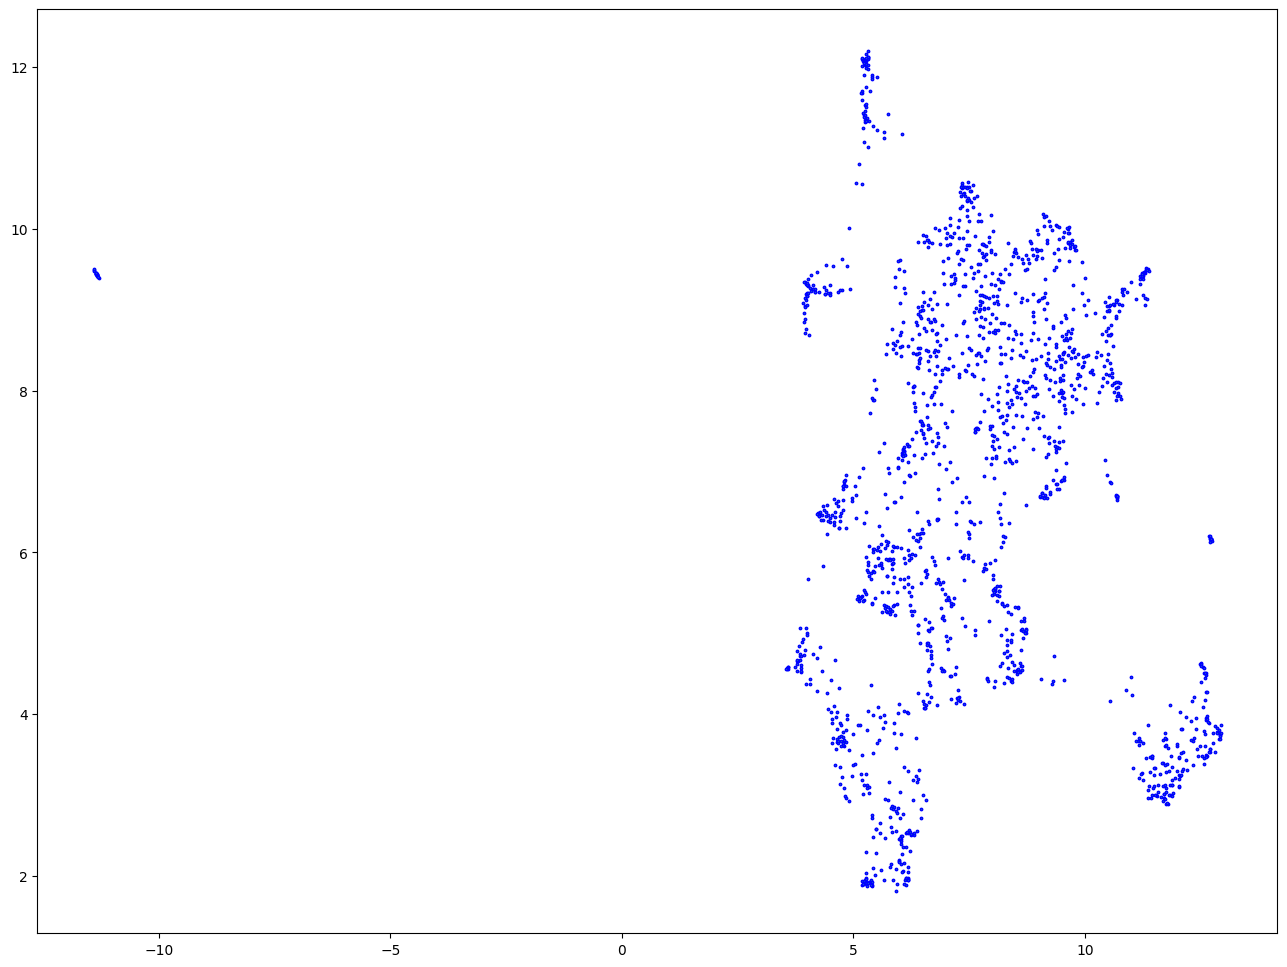

In [12]:
fig, ax = plt.subplots()
ax.scatter(umaped_vct[:, 0], umaped_vct[:, 1], edgecolor='b', s=3)
plt.show()